### 출처: https://www.kaggle.com/vbmokin/50-advanced-tips-data-science-for-tabular-data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix
import warnings
warnings.simplefilter('ignore')

In [ ]:
data_titanic = pd.read_csv('/content/drive/MyDrive/kaggle_data/Titanic - Machine Learning from Disaster/train.csv')
data_titanic
#data_titanic.head(10)
#data_titanic.tail(10)

# # e + 00 없애기
# pd.options.display.float_format = '{:.1f}'.format
# # 모든 행 출력
pd.set_option('display.max_rows', 10) # 10
data_titanic.head(30)

PassengerId  Survived  Pclass  ...      Fare        Cabin  Embarked
0             1         0       3  ...    7.2500          NaN         S
1             2         1       1  ...   71.2833          C85         C
2             3         1       3  ...    7.9250          NaN         S
3             4         1       1  ...   53.1000         C123         S
4             5         0       3  ...    8.0500          NaN         S
..          ...       ...     ...  ...       ...          ...       ...
25           26         1       3  ...   31.3875          NaN         S
26           27         0       3  ...    7.2250          NaN         C
27           28         0       1  ...  263.0000  C23 C25 C27         S
28           29         1       3  ...    7.8792          NaN         Q
29           30         0       3  ...    7.8958          NaN         S

[30 rows x 12 columns]

In [ ]:
data_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data_titanic.shape

(891, 12)

In [ ]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_titanic.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [ ]:
data_titanic_num = data_titanic[['Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Survived']].copy()

# 결측값(None or np.nan) 있는 데이터(행, 열, 특정 행열)제거: dropna()
# 결측값 행 데이터 제거: dropna(axis = 0) (기본)
# 결측값 열 데이터 제거: dropna(axis = 1)
data_titanic_num = data_titanic_num.dropna()
data_titanic_num 

Sex   Age  SibSp  Parch Embarked  Survived
0      male  22.0      1      0        S         0
1    female  38.0      1      0        C         1
2    female  26.0      0      0        S         1
3    female  35.0      1      0        S         1
4      male  35.0      0      0        S         0
..      ...   ...    ...    ...      ...       ...
885  female  39.0      0      5        Q         0
886    male  27.0      0      0        S         0
887  female  19.0      0      0        S         1
889    male  26.0      0      0        C         1
890    male  32.0      0      0        Q         0

[712 rows x 6 columns]

In [ ]:
# 중복 여부 확인: DataFrame.duplicated()
data_titanic_num = data_titanic_num.drop_duplicates()
data_titanic_num

Sex   Age  SibSp  Parch Embarked  Survived
0      male  22.0      1      0        S         0
1    female  38.0      1      0        C         1
2    female  26.0      0      0        S         1
3    female  35.0      1      0        S         1
4      male  35.0      0      0        S         0
..      ...   ...    ...    ...      ...       ...
875  female  15.0      0      0        C         1
879  female  56.0      0      1        C         1
880  female  25.0      0      1        S         1
885  female  39.0      0      5        Q         0
890    male  32.0      0      0        Q         0

[463 rows x 6 columns]

### 범주형 변수가 문자열 data type을 가지고 있을 경우, 클래스 레이블을 정수형으로 인코딩해야 한다. 

In [ ]:
# df.map()  Series 타입에서만 사용가능
# df.apply() Series, DataFrame 타입 모두 사용가능
# df.applymap() DataFrame 클래스인
df1 = data_titanic_num.copy()
df1["Sex"] = data_titanic_num["Sex"].map({"female":0, "male":1})
df1["Embarked"] = data_titanic_num["Embarked"].map({"S":0, "C":1, "Q": 2})
df1.head(20)

Sex   Age  SibSp  Parch  Embarked  Survived
0     1  22.0      1      0         0         0
1     0  38.0      1      0         1         1
2     0  26.0      0      0         0         1
3     0  35.0      1      0         0         1
4     1  35.0      0      0         0         0
6     1  54.0      0      0         0         0
7     1   2.0      3      1         0         0
8     0  27.0      0      2         0         1
9     0  14.0      1      0         1         1
10    0   4.0      1      1         0         1
11    0  58.0      0      0         0         1
12    1  20.0      0      0         0         0
13    1  39.0      1      5         0         0
14    0  14.0      0      0         0         0
15    0  55.0      0      0         0         1
16    1   2.0      4      1         2         0
18    0  31.0      1      0         0         0
21    1  34.0      0      0         0         1
22    0  15.0      0      0         2         1
23    1  28.0      0      0         0         1

In [ ]:
# astype("category").cat.codes
# 
df2 = data_titanic_num.copy()
df2["Embarked"] = df2["Embarked"].astype('category').cat.codes
df2["Sex"] = df2["Sex"].astype('category').cat.codes
df2

Sex   Age  SibSp  Parch  Embarked  Survived
0      1  22.0      1      0         2         0
1      0  38.0      1      0         0         1
2      0  26.0      0      0         2         1
3      0  35.0      1      0         2         1
4      1  35.0      0      0         2         0
..   ...   ...    ...    ...       ...       ...
875    0  15.0      0      0         0         1
879    0  56.0      0      1         0         1
880    0  25.0      0      1         2         1
885    0  39.0      0      5         1         0
890    1  32.0      0      0         1         0

[463 rows x 6 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 는 1차원 배열(fltmxm, ndarray, Series) 단위로 처리한다.

#인코딩전 원래 값들의 class들을 저장하 (유용!) // 위에꺼는 간단 코드 짤때
# key: 컬럼명, value:classes_
enc_classes = {}
def encoding_label(x): # x: 범주형 타입의 컬럼(Series)
    # global enc_classes
    # enc_classes = {}
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)

    enc_classes[x.name] = le.classes_ # x.name: 컬럼명

    return label

In [ ]:
df2 = data_titanic_num.copy()
df2["Sex"] = encoding_label(df2["Sex"])
df2["Embarked"] = encoding_label(df2["Embarked"])
print(enc_classes)
df2

{'Sex': array(['female', 'male'], dtype=object), 'Embarked': array(['C', 'Q', 'S'], dtype=object)}


Sex   Age  SibSp  Parch  Embarked  Survived
0      1  22.0      1      0         2         0
1      0  38.0      1      0         0         1
2      0  26.0      0      0         2         1
3      0  35.0      1      0         2         1
4      1  35.0      0      0         2         0
..   ...   ...    ...    ...       ...       ...
875    0  15.0      0      0         0         1
879    0  56.0      0      1         0         1
880    0  25.0      0      1         2         1
885    0  39.0      0      5         1         0
890    1  32.0      0      0         1         0

[463 rows x 6 columns]

In [ ]:
data_health = pd.read_csv("/content/drive/MyDrive/kaggle_data/Heart Disease UCI/heart.csv")
data_health = data_health.drop_duplicates() # 데이터 중복 제거
data_health = data_health.dropna() # Nan 제거
data_health.tail(3)

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      1   1     2       0

[3 rows x 14 columns]

## requests 모듈
### 파이썬용 HTTP 라이브러리
### URL로 데이터 가져올 때 사용

In [ ]:
# Download one file
import requests
print('Download daily data from the Portal of RNBO of Ukraine')
myfile = requests.get('https://api-covid19.rnbo.gov.ua/charts/main-data?mode=ukraine&fbclid=IwAR1vNXEE0nkmorUmGP4StG4cLrj1Z9VoX3c3Bi8dfltr0elgOj4b0M3ONvk')
open('filename', 'wb').write(myfile.content)
data_covid = pd.read_json('filename')
data_covid[:3]

Download daily data from the Portal of RNBO of Ukraine


dates  confirmed  deaths  recovered  existing
0  2020-01-22          0       0          0         0
1  2020-01-23          0       0          0         0
2  2020-01-24          0       0          0         0

In [ ]:
# For any part of the notebook
import time

start_time = time.time()
print("time.time():", start_time) # 시간대는 UTC(Universal Time Coordinated, 협정 세계시)
print('Start time:', time.strftime("%H:%M:%S",time.localtime()))

# ... code.... some cells

second_time = time.time() - start_time
print('Time Taken:', time.strftime("%H:%M:%S",time.gmtime(second_time)))

time.time(): 1629865193.1219826
Start time: 04:19:53
Time Taken: 00:00:00


In [ ]:
from datetime import datetime
# 특정 타임존의 시간
import pytz
KR_time = datetime.now(pytz.timezone("Asia/Seoul"))
print(KR_time)

2021-08-25 13:19:53.135477+09:00


In [ ]:
# 현재 코드 진행상태 확인: tqdm
# 옵션 desc: 진행 작업에 대한 설명
# mininterval, maxinterval : 업데이트 주기. 기본값 mininterval=0.1 sec, maxinterval=10 sec
from tqdm import tqdm 

for ii in tqdm(range(100), desc="tqdm example", mininterval=0.01): 
    # print(ii) 
    time.sleep(0.1)

tqdm example: 100%|██████████| 100/100 [00:10<00:00,  9.87it/s]


## 탐색 적 데이터 분석 (EDA)

###모델을 진행하기 전에 데이터를 분석하고 데이터 세트가 가지고있는 패턴, 시각적 통찰력 등을 찾는 접근 방식

### 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정

In [ ]:
!pip install xlrd
!pip install autoviz # 데이터 세트 자동 시각화 패키지
from autoviz.AutoViz_Class import AutoViz_Class

In [ ]:
data_health.to_csv('/content/drive/MyDrive/kaggle_data/Heart Disease UCI/data_EDA.csv', index=False)

In [ ]:
data_health.head(3)

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1

[3 rows x 14 columns]

Shape of your Data Set loaded: (302, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################
Data Set Shape: 302 rows, 14 cols
Data Set columns info:
* age: 0 nulls, 41 unique vals, most common: {58: 19, 57: 17}
* sex: 0 nulls, 2 unique v

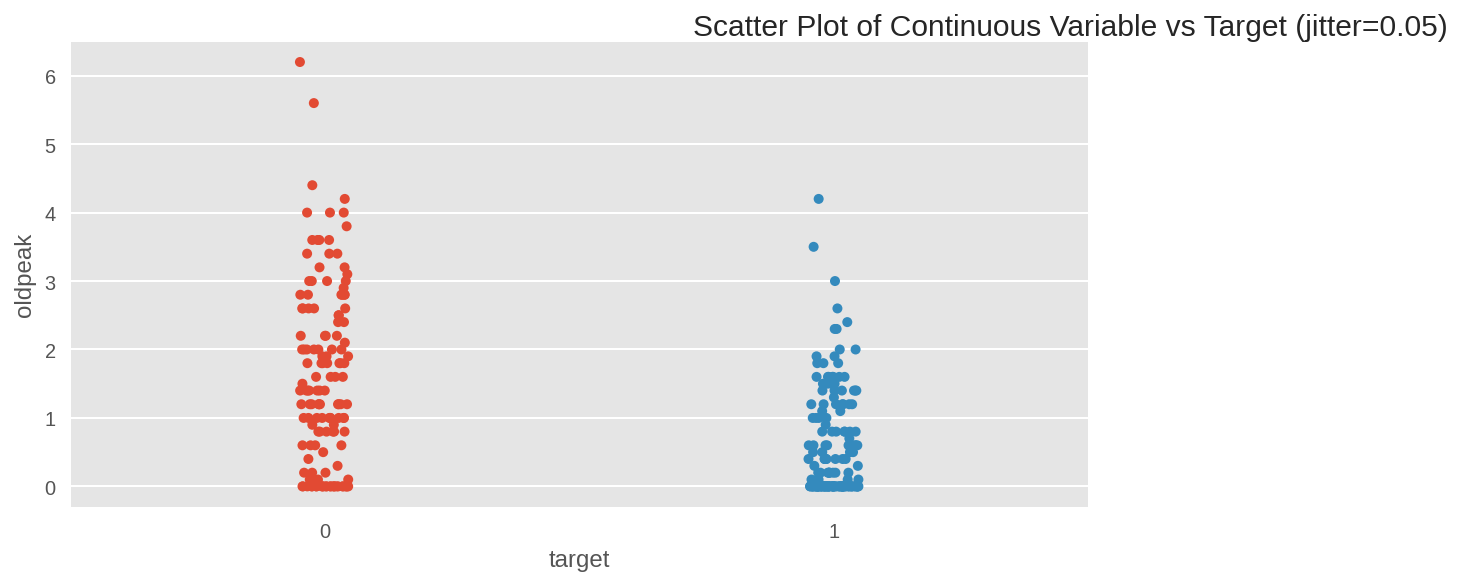

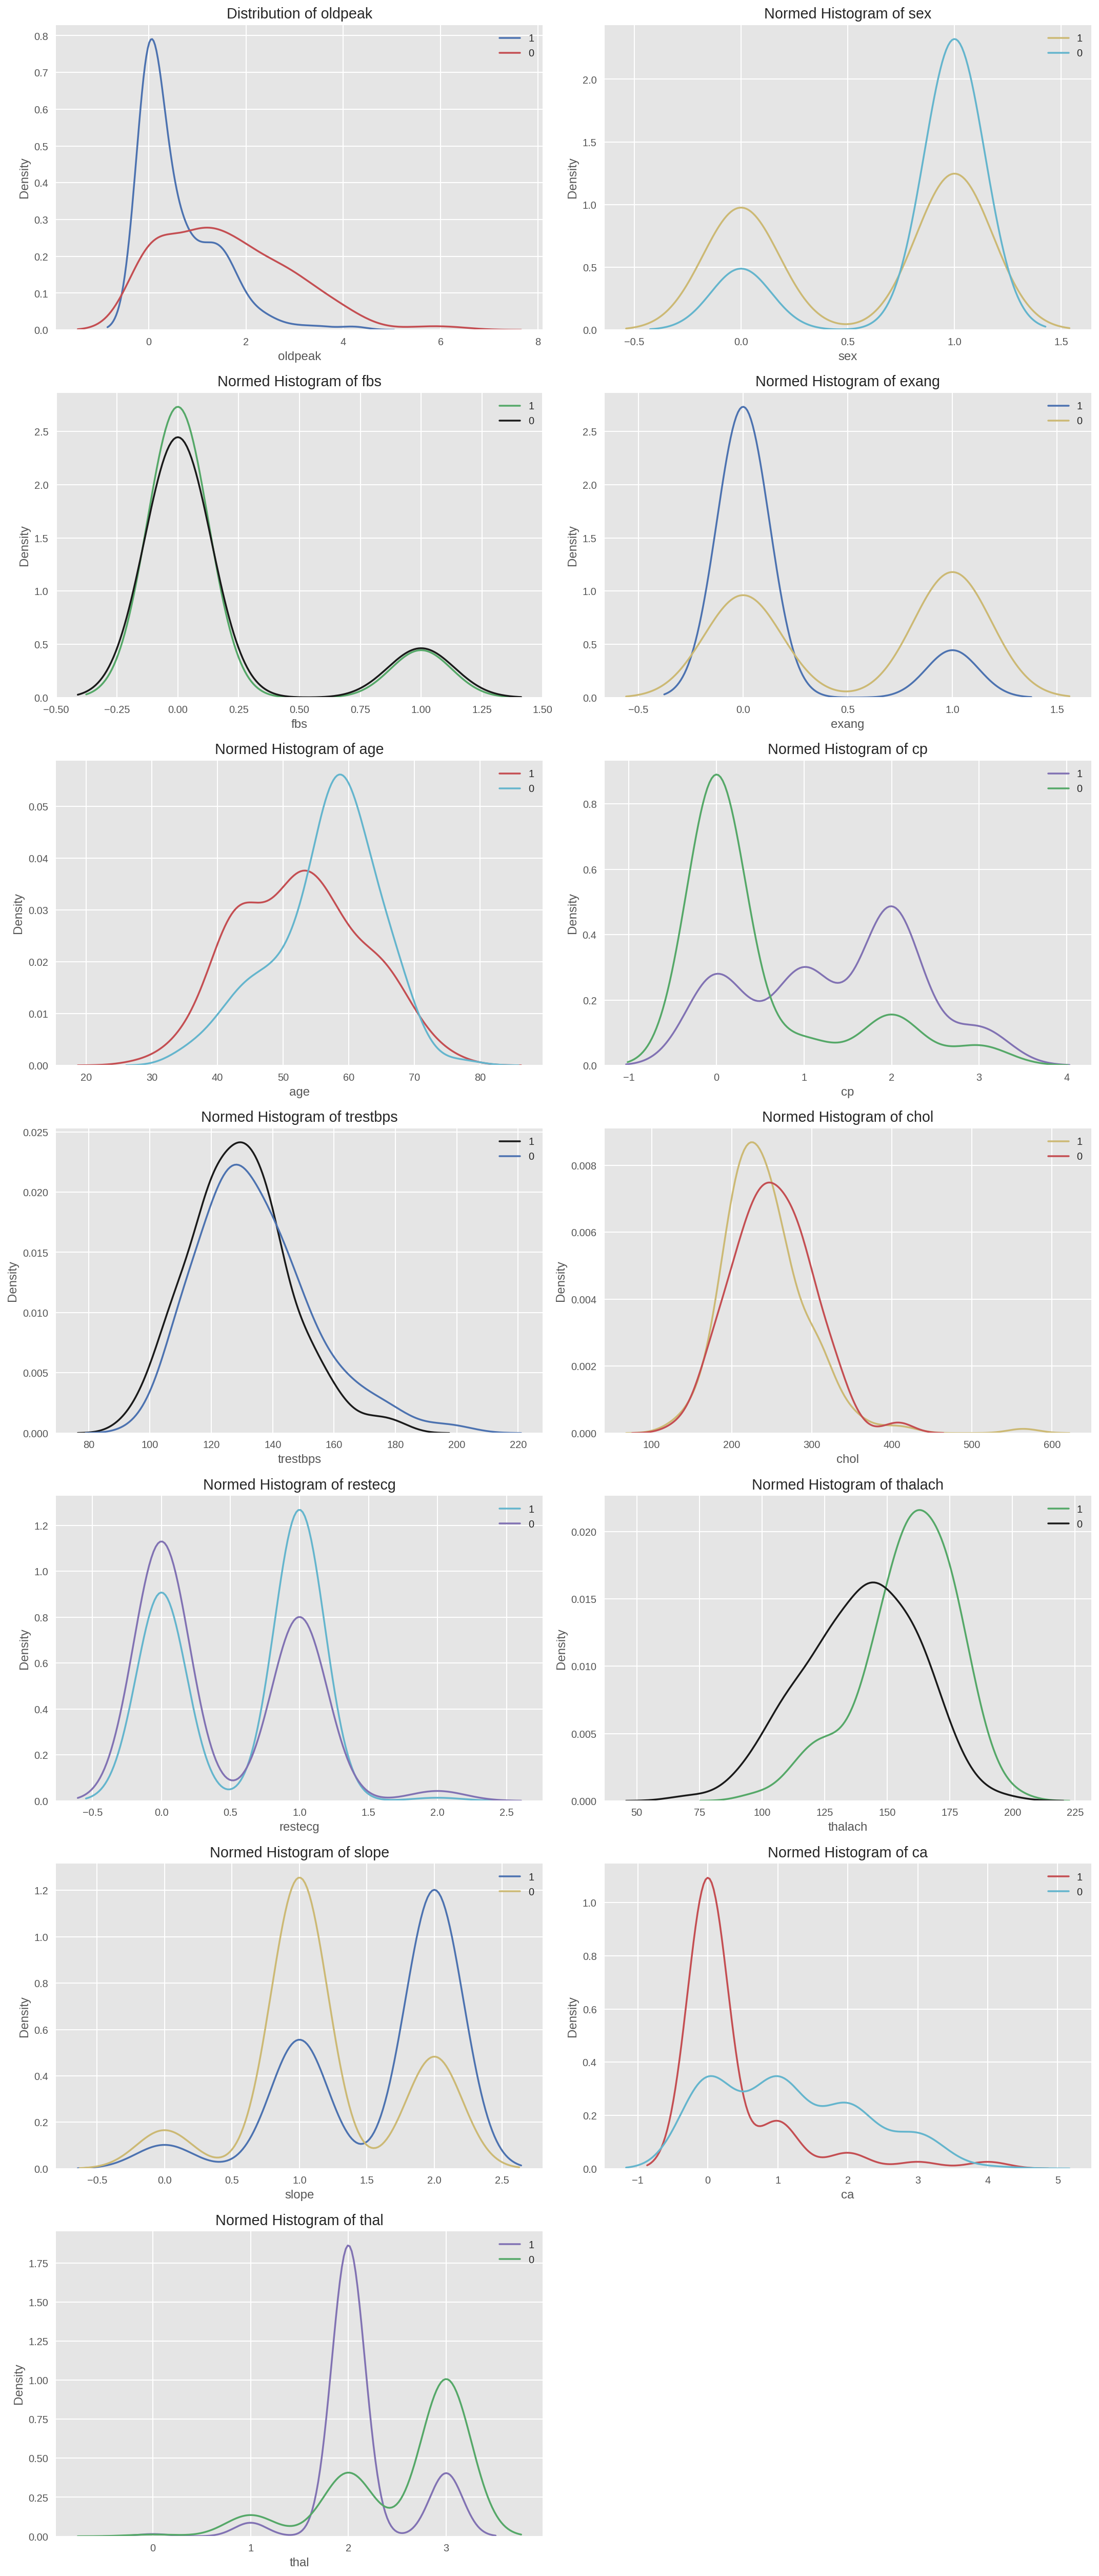

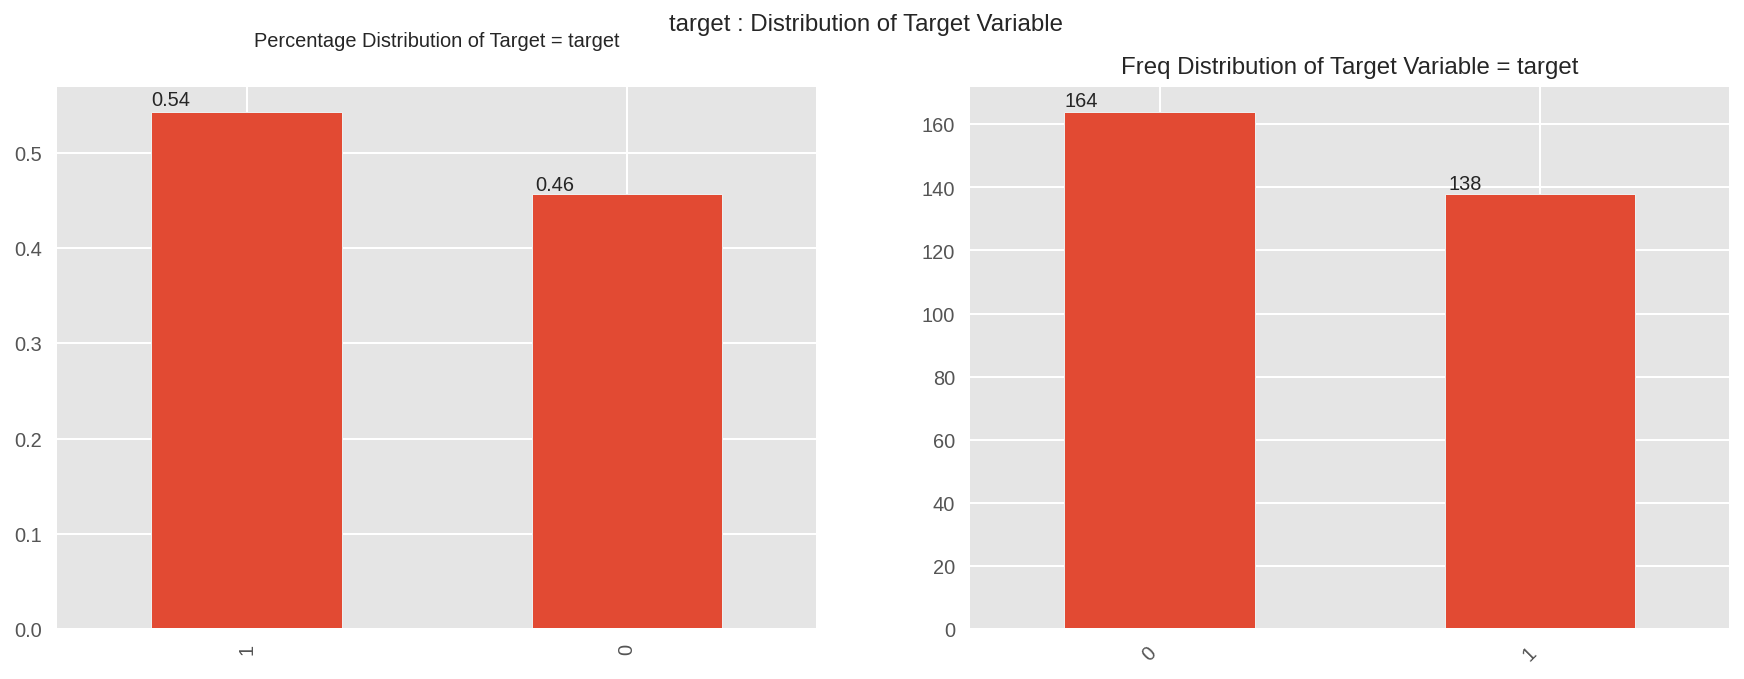

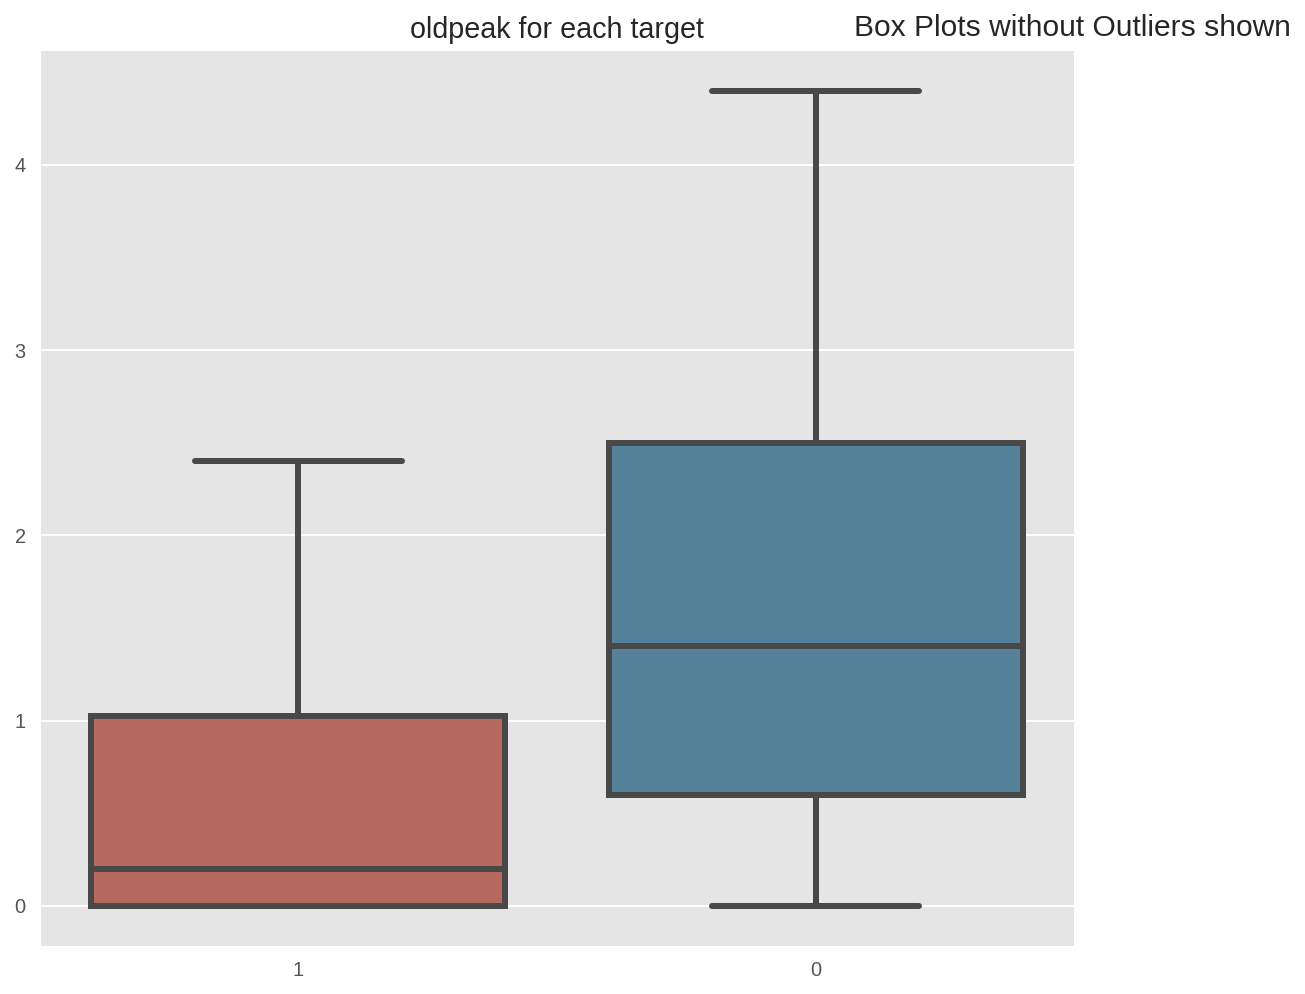

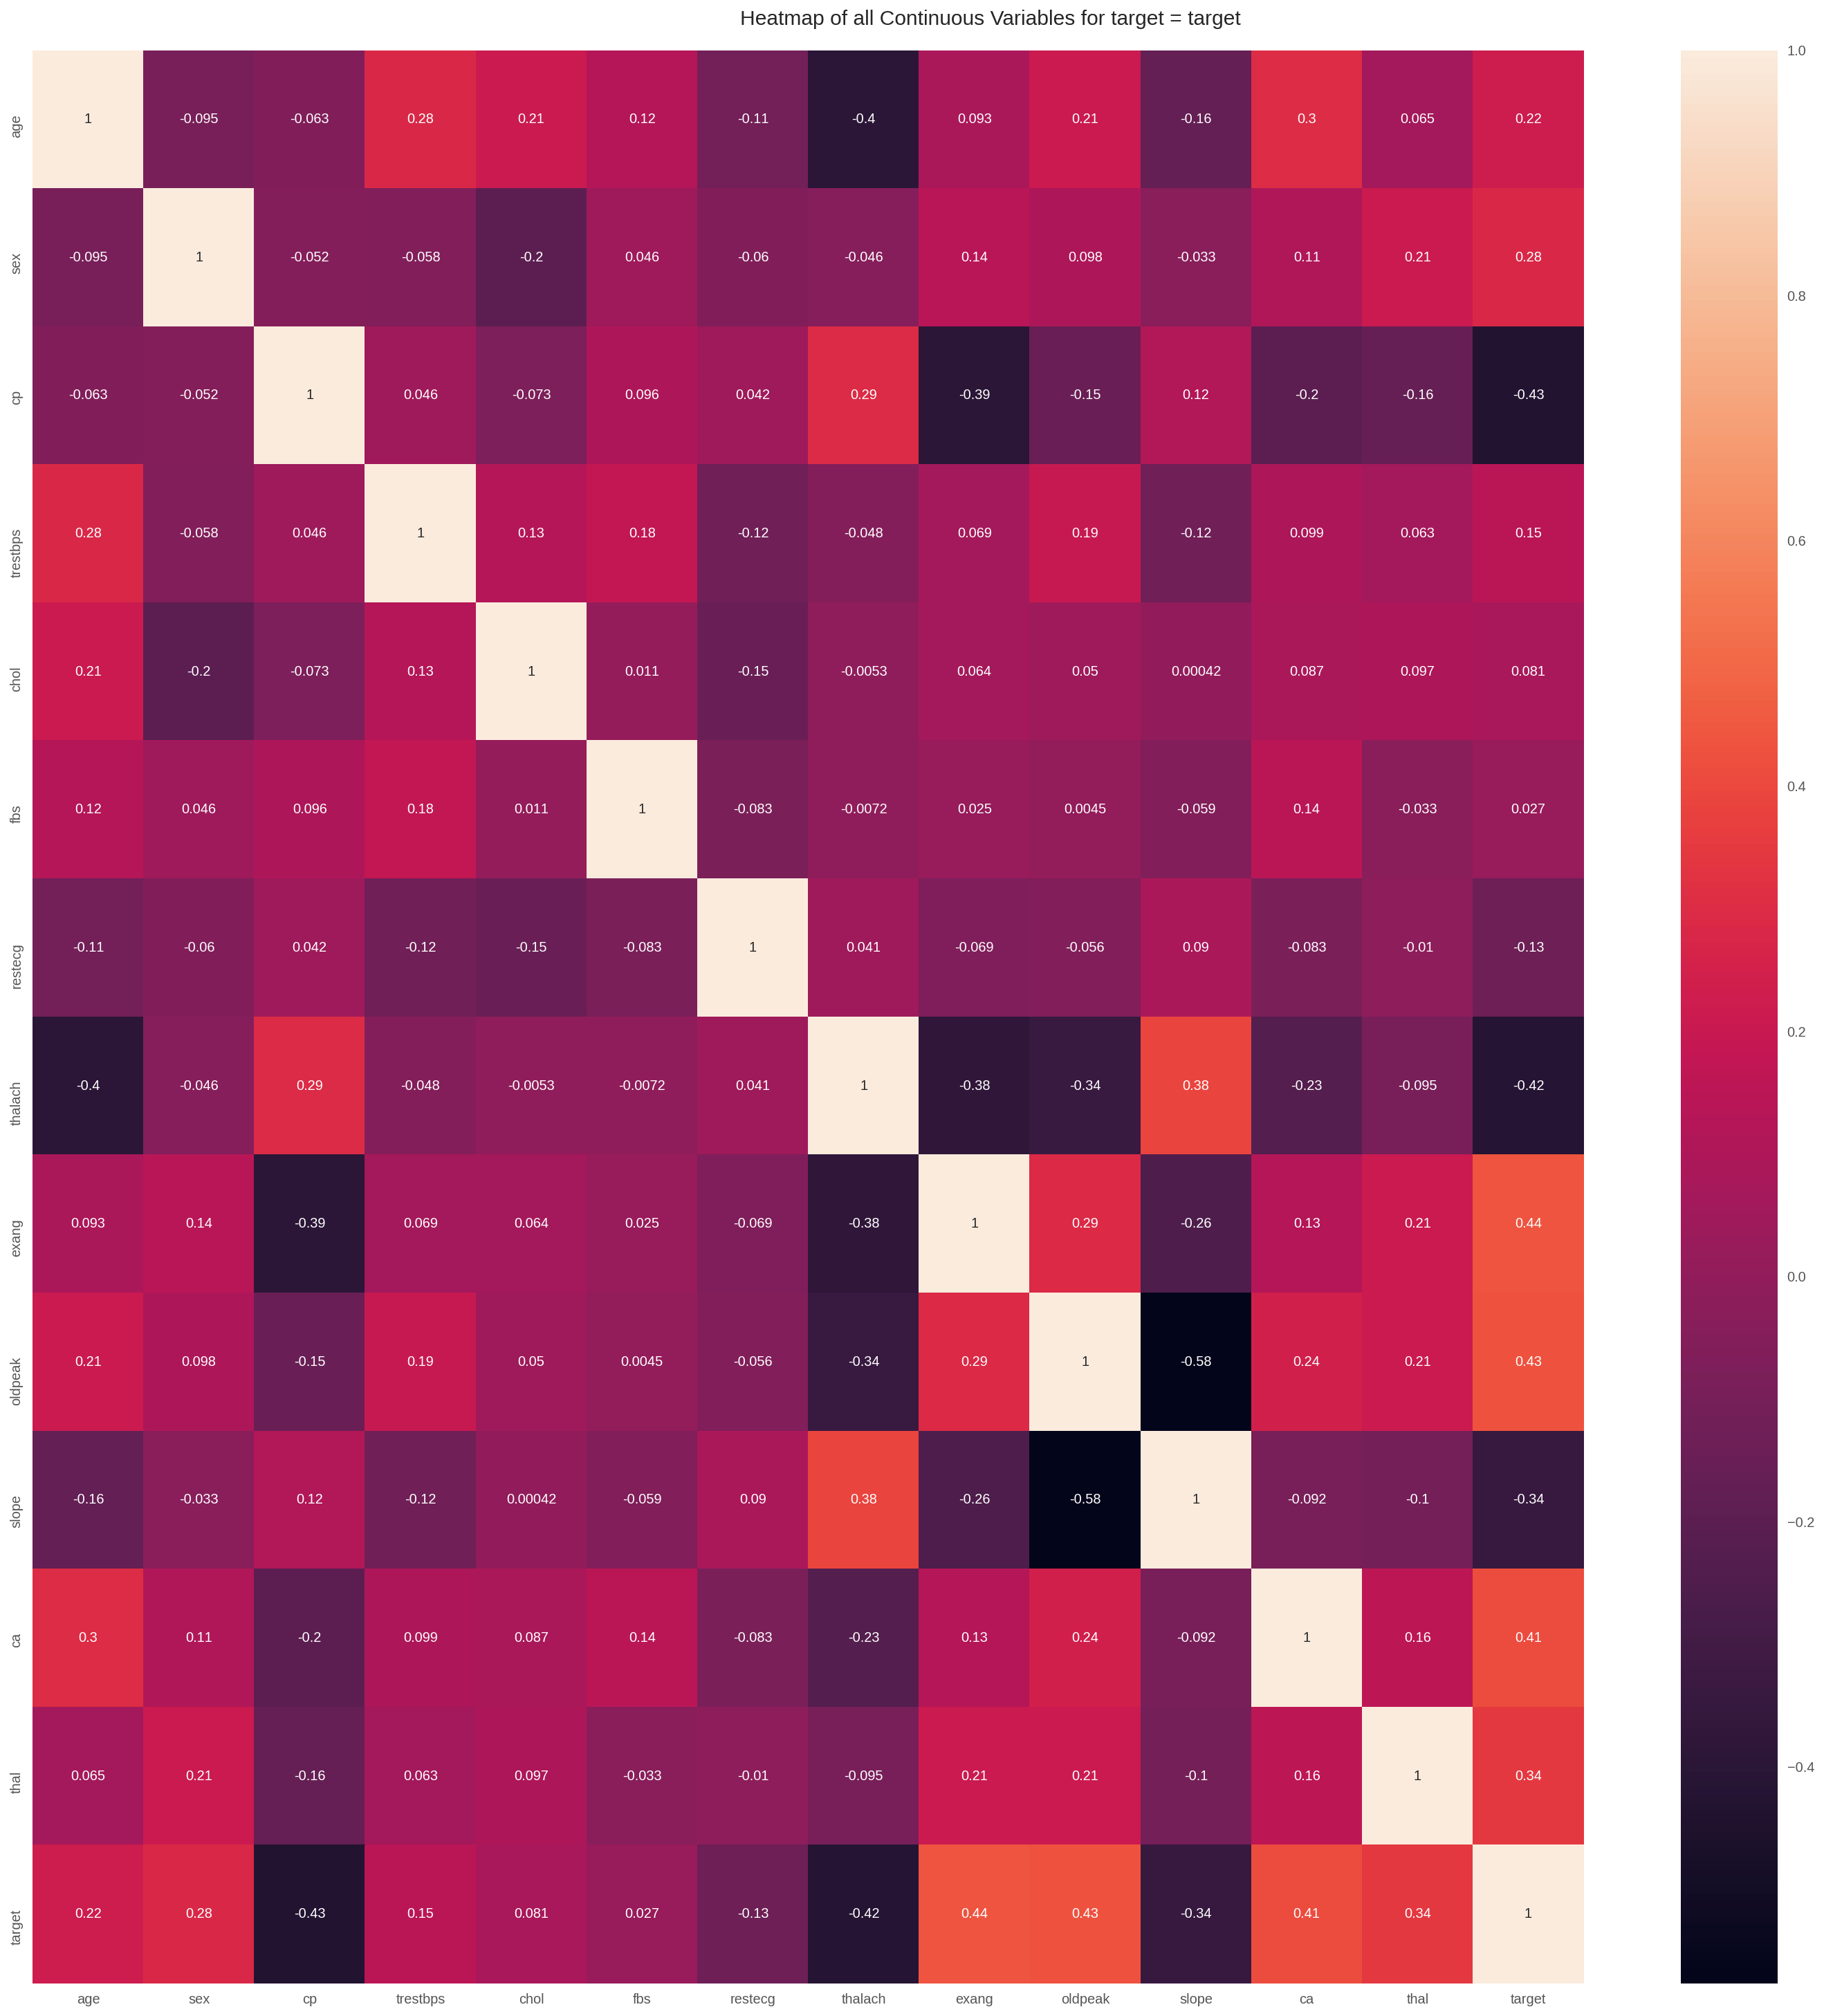

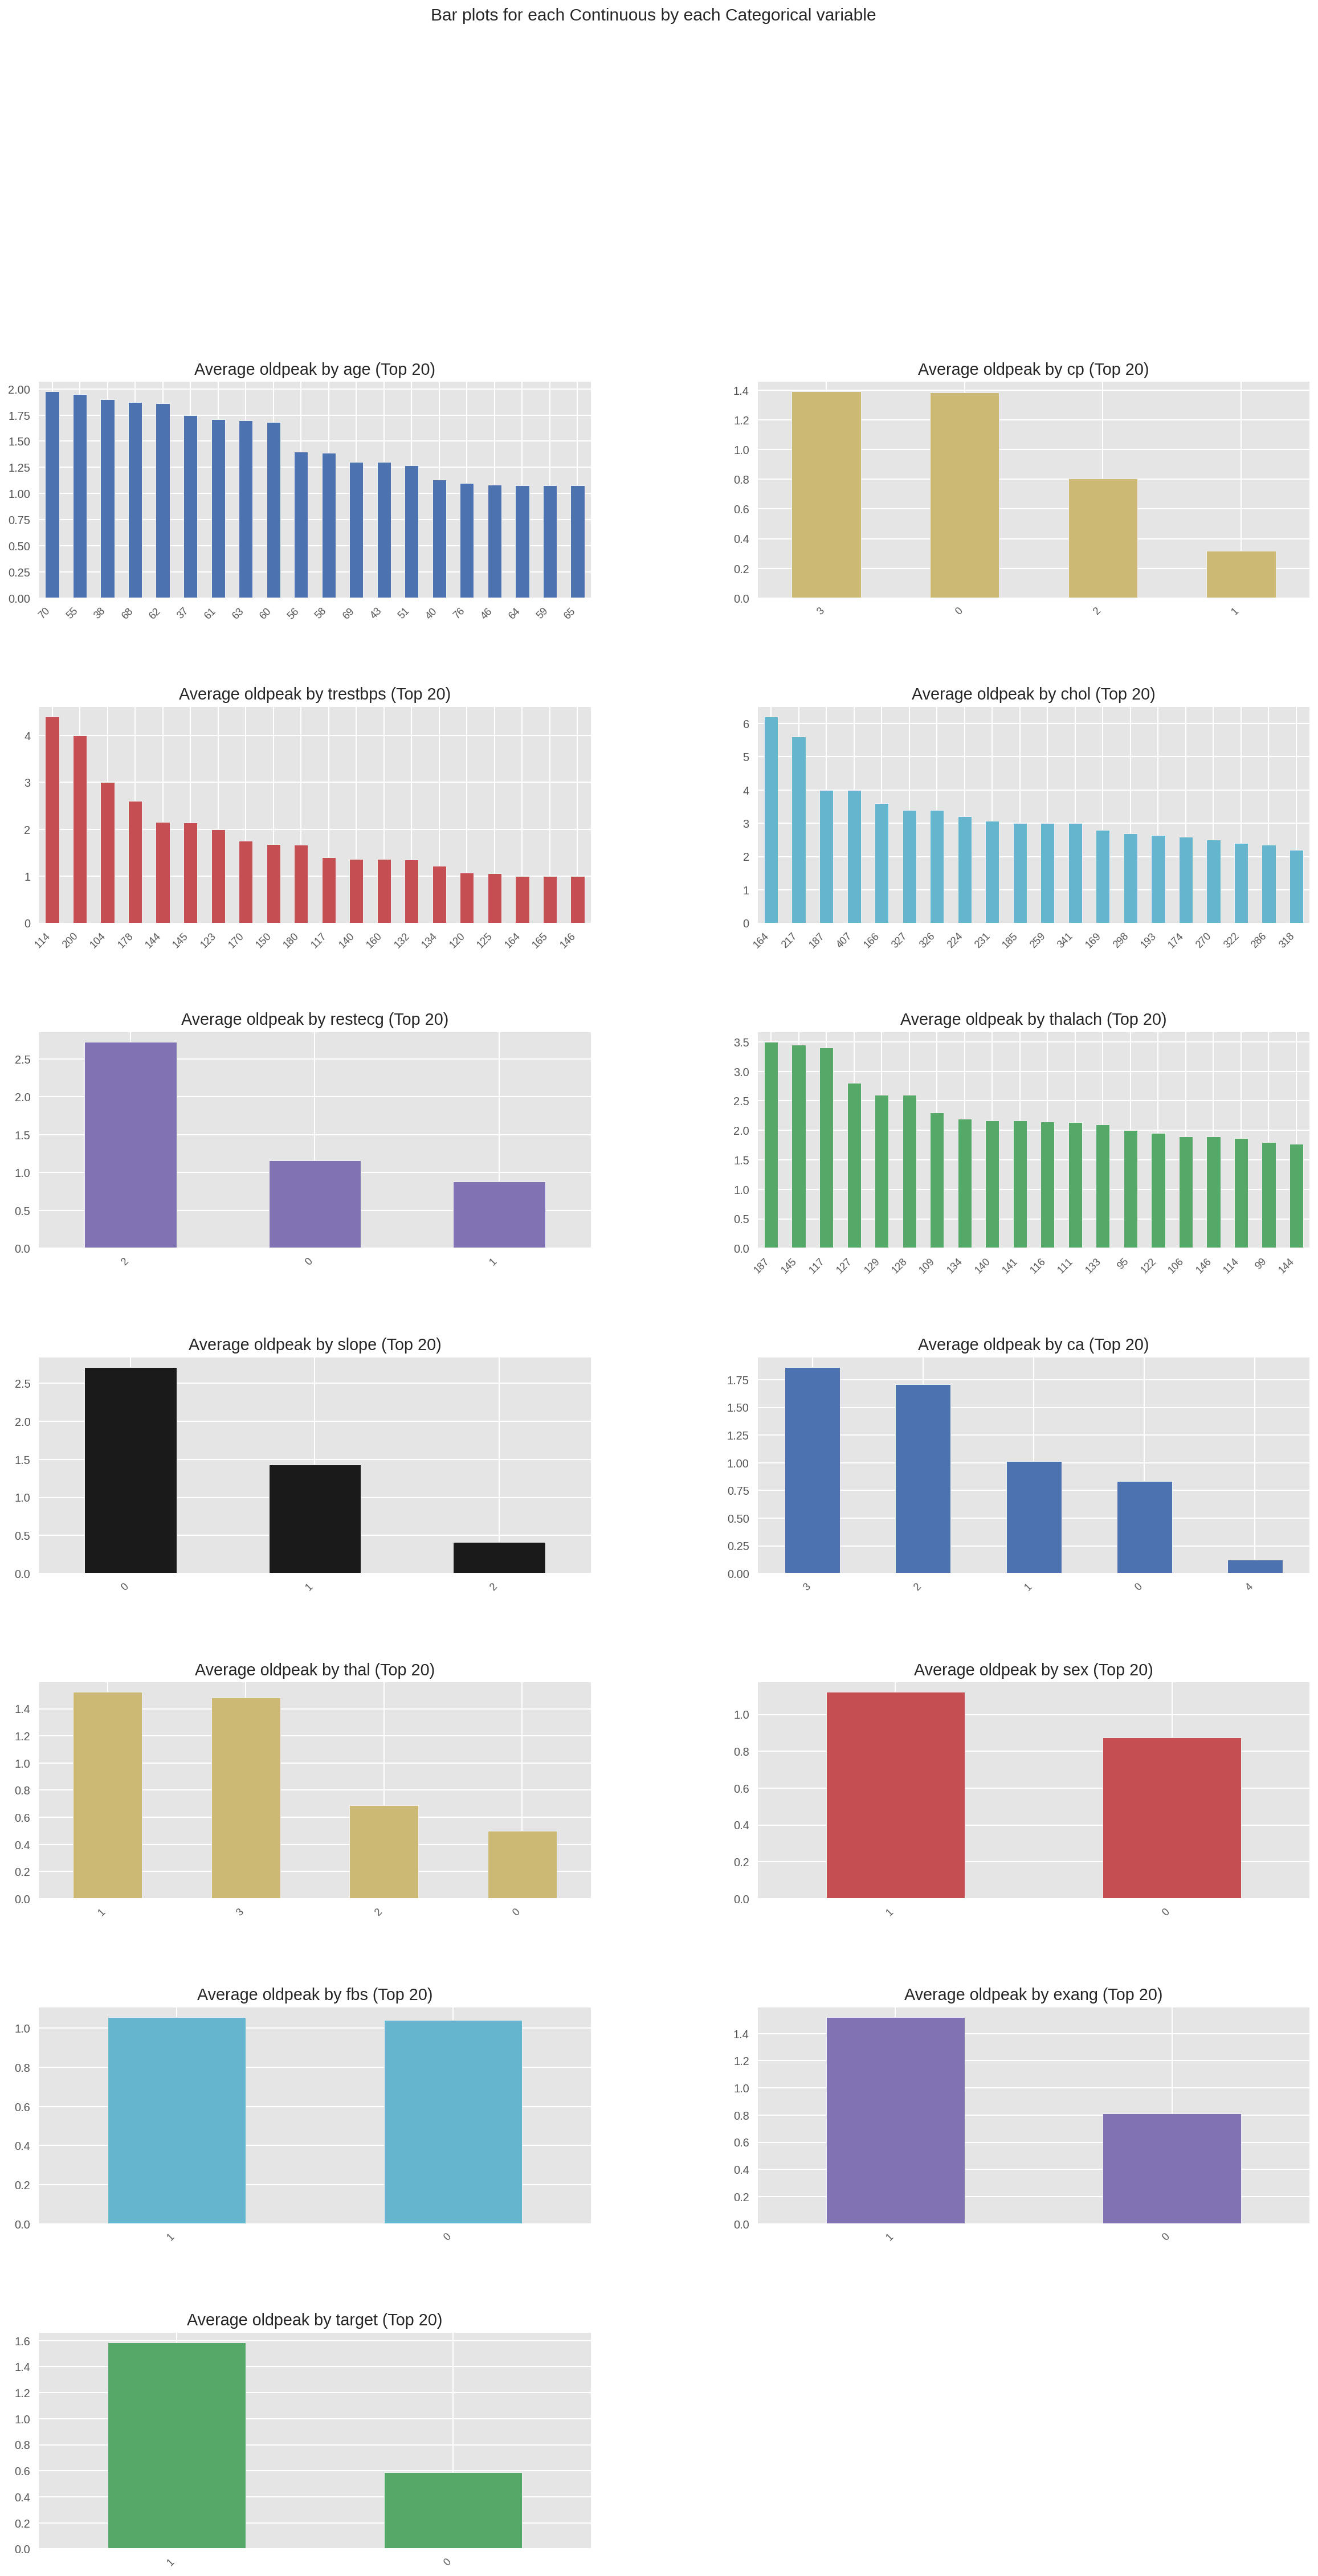

Time to run AutoViz (in seconds) = 37.232

 ###################### VISUALIZATION Completed ########################


In [ ]:
AV = AutoViz_Class()
data = pd.read_csv('/content/drive/MyDrive/kaggle_data/Heart Disease UCI/data_EDA.csv')
df = AV.AutoViz(filename="", sep=',', depVar='target', dfte=data, header=0, verbose=1, lowess=False, 
                chart_format='svg',  max_cols_analyzed=15)

In [ ]:
!pip install pandas-profiling==2.11.0

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(data_health)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data_health.describe()

age         sex          cp  ...          ca        thal      target
count  302.00000  302.000000  302.000000  ...  302.000000  302.000000  302.000000
mean    54.42053    0.682119    0.963576  ...    0.718543    2.314570    0.543046
std      9.04797    0.466426    1.032044  ...    1.006748    0.613026    0.498970
min     29.00000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     48.00000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.50000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.00000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.00000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [ ]:
df = data_health[['sex', 'cp', 'trestbps', 'fbs', 'restecg', 'target']].copy()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
#df = data_titanic_num.copy()
#target = df.pop('Survived')
#df = data_health.copy()
target = df.pop('target')
pca.fit(df)
pca_samples = pca.transform(df)
ps = pd.DataFrame(pca_samples)
ps.head()

0         1         2
0  13.407113  1.998705 -0.696196
1  -1.602444  1.040700  0.344424
2  -1.600195  0.038016 -0.320220
3 -11.605010  0.070081  0.345818
4 -11.606220 -0.900402  0.641250

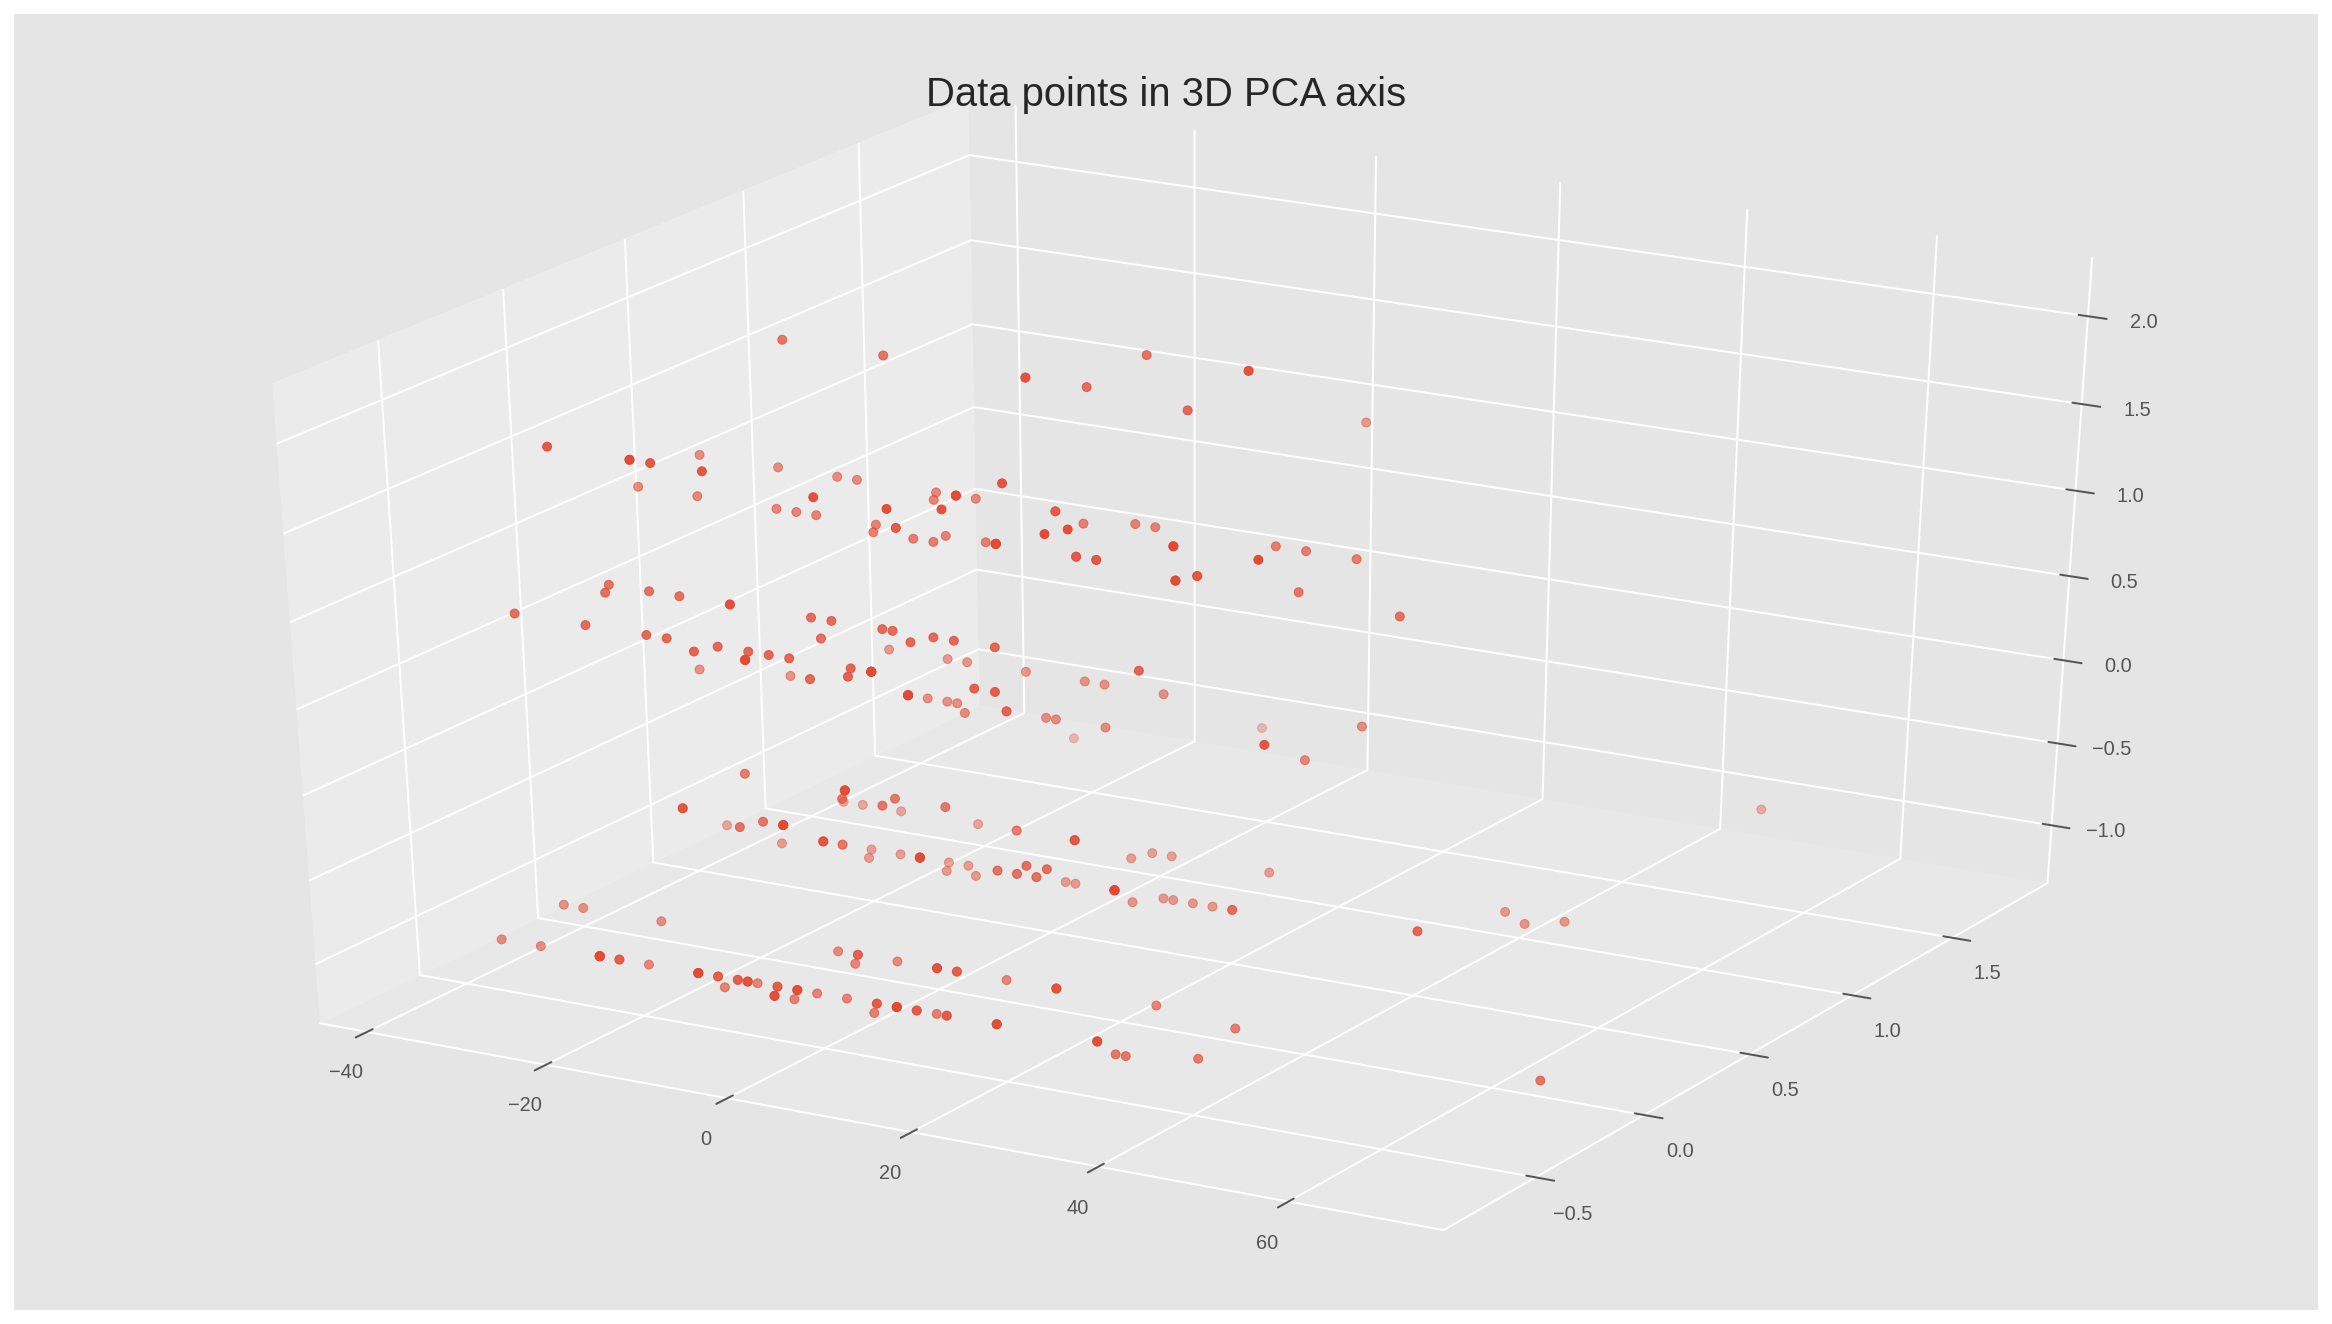

In [ ]:
# Thanks to https://www.kaggle.com/tanetboss/user-clustering-for-anime-recommendation (clustering)
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

tocluster = pd.DataFrame(ps[[0,1,2]])
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

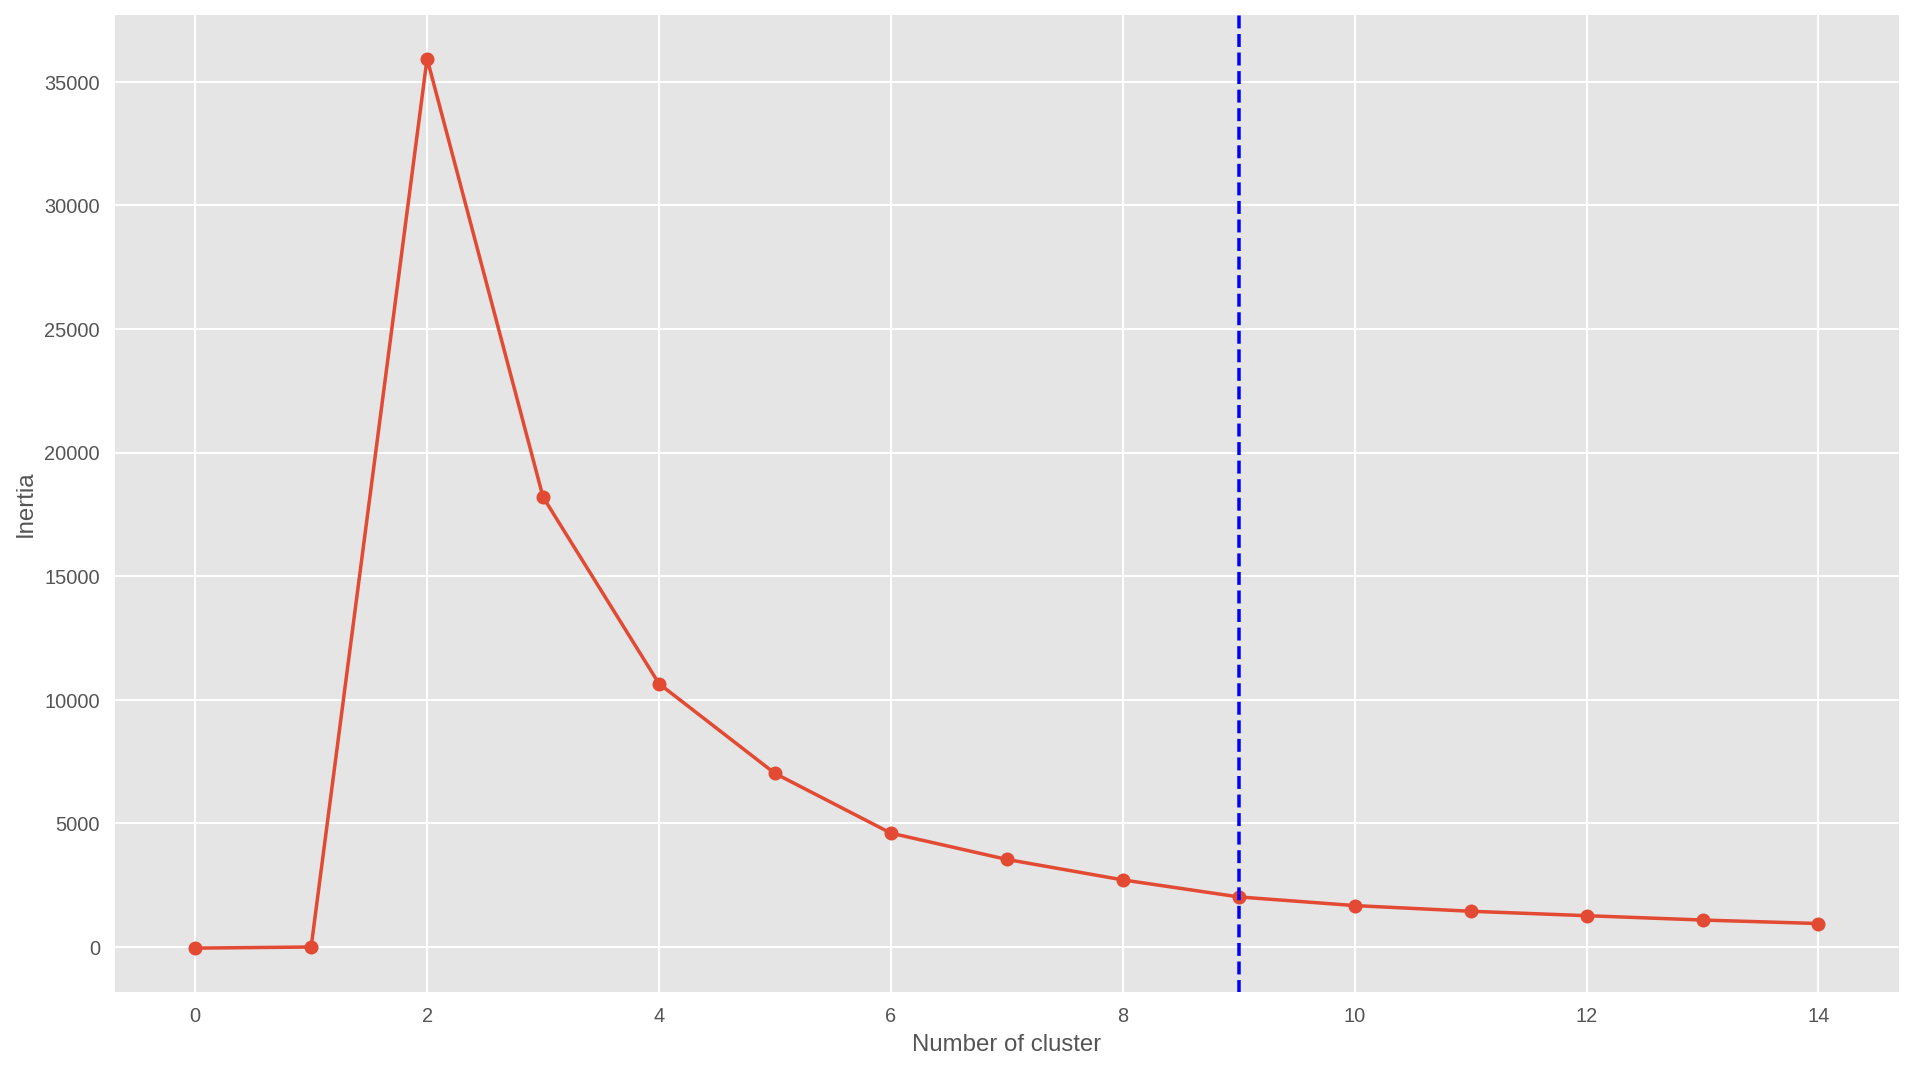

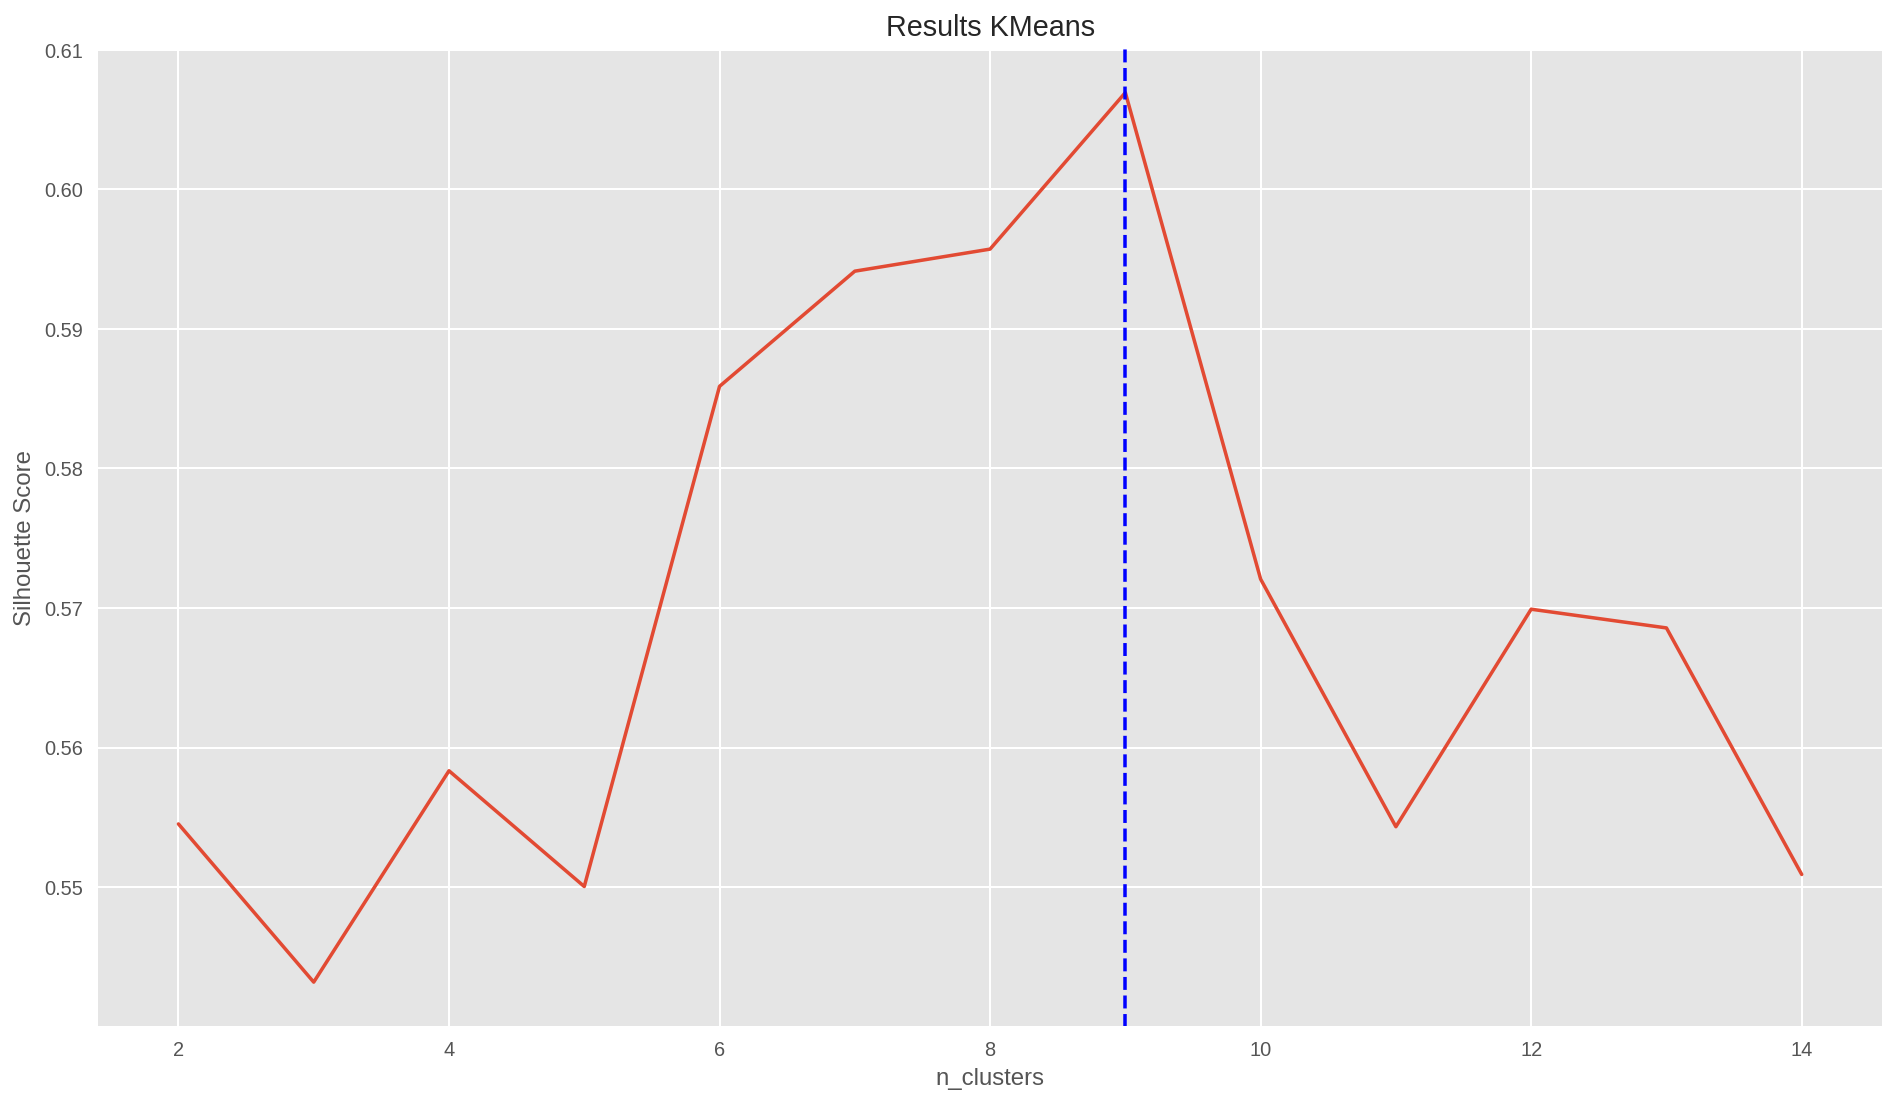

In [ ]:
# Thanks to https://www.kaggle.com/tanetboss/user-clustering-for-anime-recommendation (clustering)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_max = 15
n_start = 2
scores = []
inertia_list = np.empty(n_max)

for i in range(n_start,n_max):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

n_max_shift = 2  # find maximum after this index of score
n_clusters = np.argmax(scores[n_max_shift:])+(n_start+n_max_shift) # it's my upgrade
plt.plot(range(0,n_max),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=n_clusters, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

plt.plot(range(2,n_max), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=n_clusters, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

[[-1.61784784e+00 -5.05314176e-02 -3.98445431e-02]
 [ 4.31253896e+01  1.09234866e-01  1.70644417e-01]
 [-3.06792848e+01  1.26444119e-01  2.51704957e-02]
 [ 7.50073709e+00 -7.06951994e-02  2.05471847e-03]
 [-1.05133731e+01  7.92291653e-02  2.46639165e-02]
 [ 1.76790432e+01  1.43349677e-01  2.22020548e-02]
 [-2.10649798e+01 -1.37530524e-01 -3.28506846e-03]
 [ 6.43983259e+01 -6.42645755e-01 -2.58820010e-01]
 [ 2.83981967e+01  8.61963229e-02 -9.67182579e-02]]


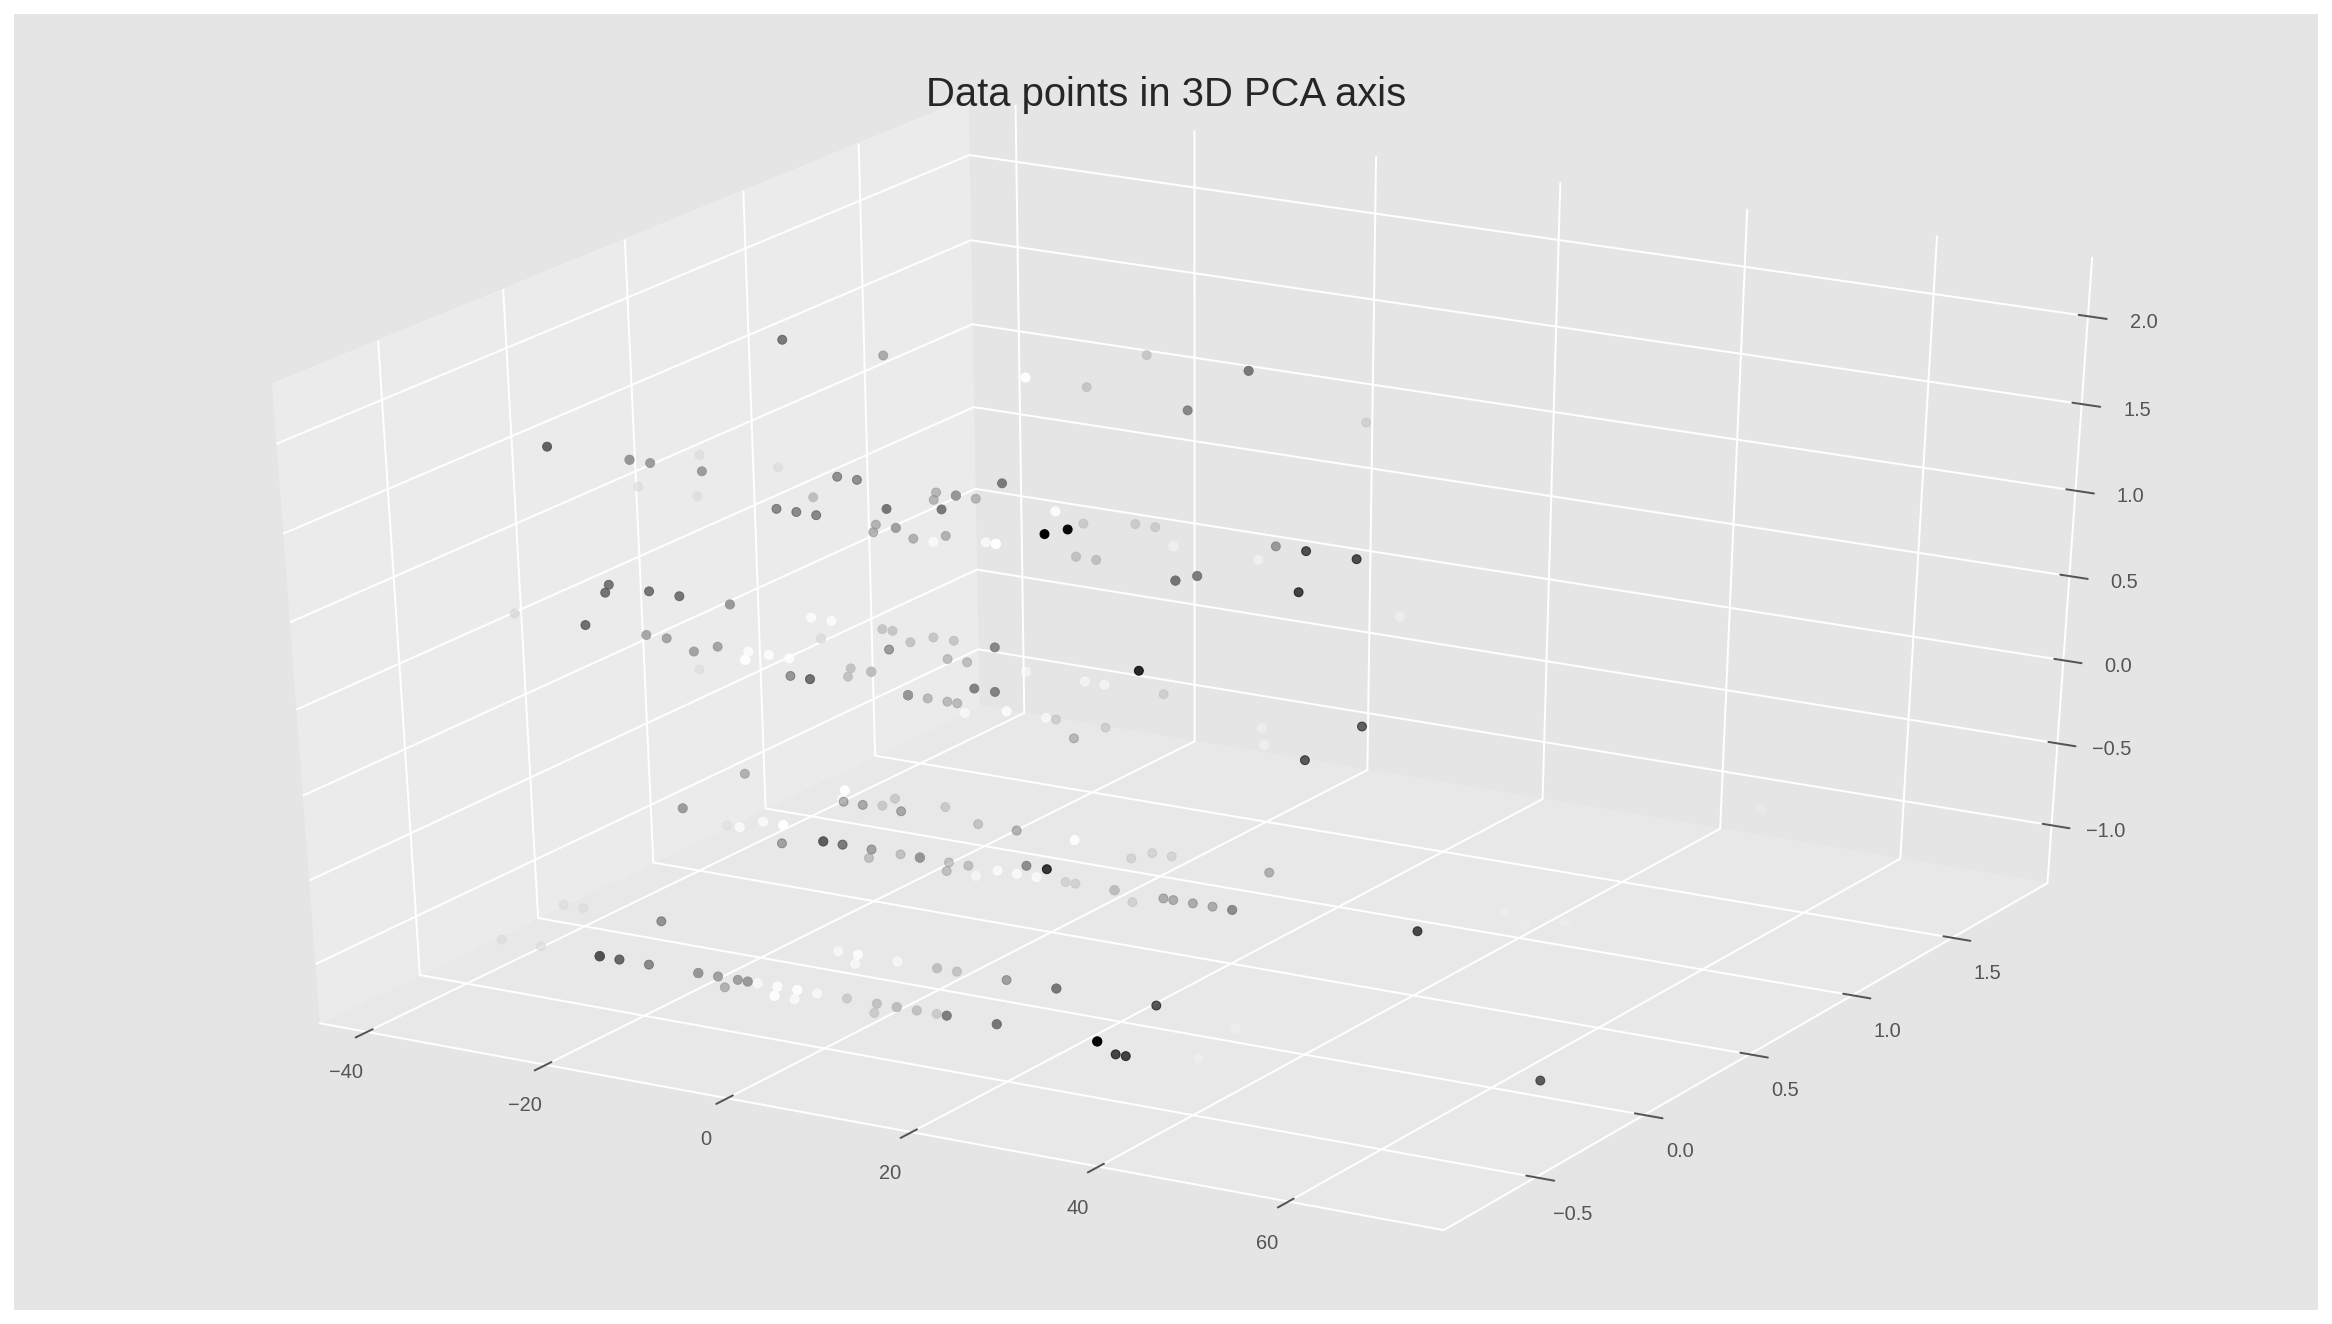

In [ ]:
# Thanks to https://www.kaggle.com/tanetboss/user-clustering-for-anime-recommendation (clustering)
clusterer = KMeans(n_clusters=n_clusters,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

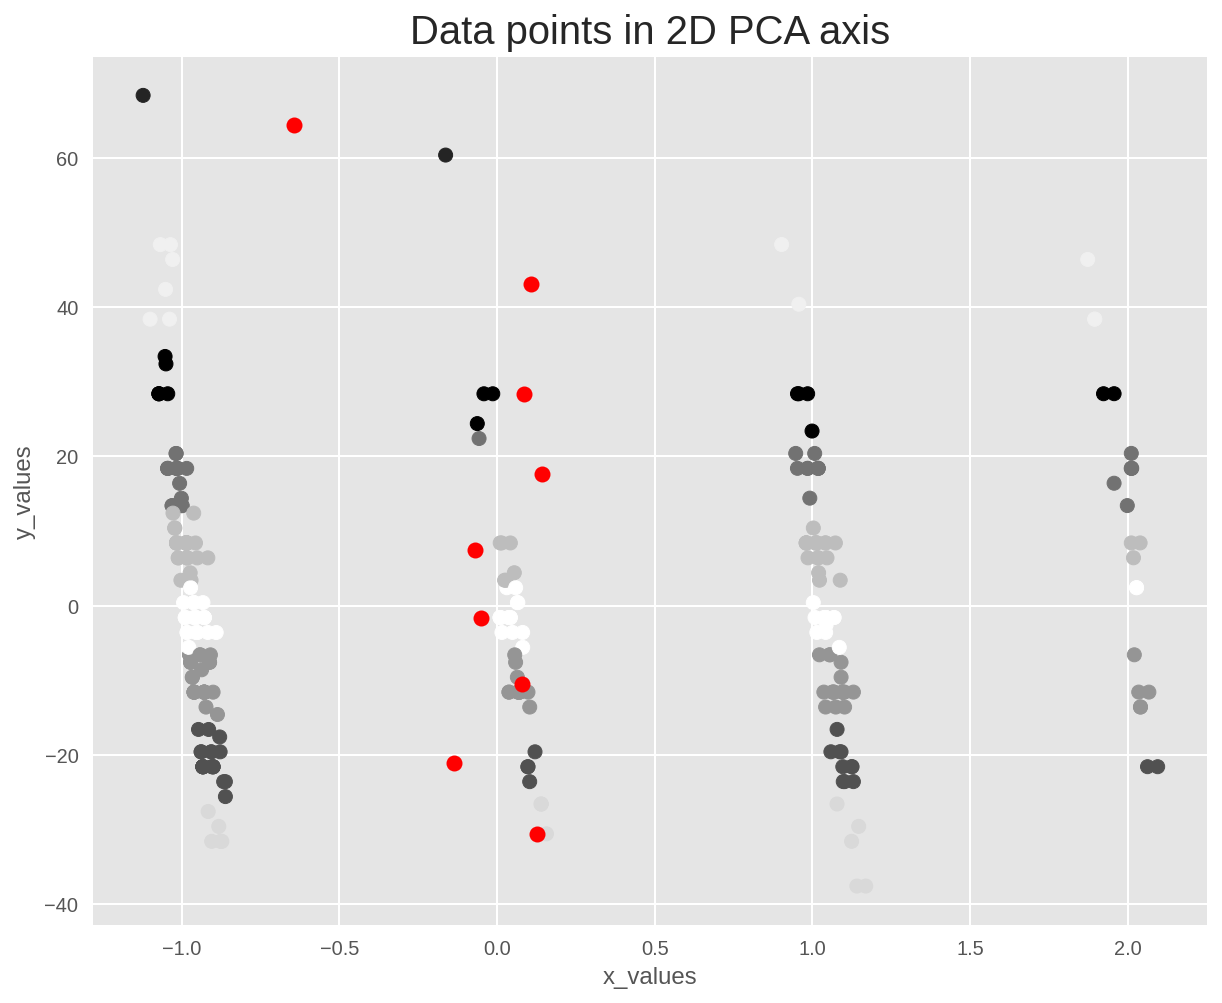

In [ ]:
# Thanks to https://www.kaggle.com/tanetboss/user-clustering-for-anime-recommendation (clustering)
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()